## Exercise 2.6

Write code that carries out FFT convolution of two signals. Plot the result. Compare the result with your solution of *exercise 1.4*.

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def convolve(a,b):
    N = len(a)
    M = len(b)
    res = np.zeros(N + M - 1)
    
    for n in range(N + M - 1):    
        for k in range(M):
            if n >= k and n - k < N:
                res[n] += a[n - k] * b[k]
    return res

def fft_convolve(a,b):
    ''' fast convolution '''
    N = len(a)
    M = len(b)
    
    A = np.fft.fft(a, n=N+M-1)
    B = np.fft.fft(b, n=N+M-1)
    C = A * B
    
    c = np.real(np.fft.ifft(C))
    
    return c[:N+M-1]


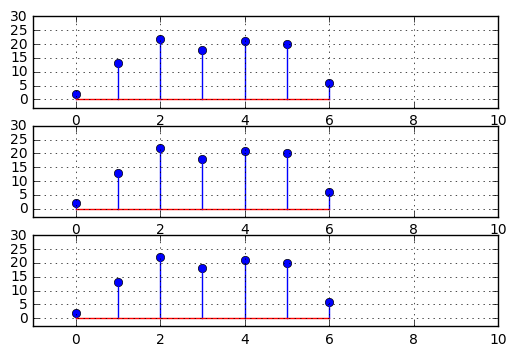

In [3]:
# demo
x = np.array([1, 5, 3, 2, 6])
h = np.array([2, 3, 1])

conv1 = sig.convolve(x,h)
conv2 = convolve(x,h)
conv_fft = fft_convolve(x,h)

plt.subplot(311)
plt.stem(conv1)
plt.xlim([-1, 10])
plt.ylim([-3, 30])
plt.grid()

plt.subplot(312)
plt.stem(conv2)
plt.xlim([-1, 10])
plt.ylim([-3, 30])
plt.grid()

plt.subplot(313)
plt.stem(conv_fft)
plt.xlim([-1, 10])
plt.ylim([-3, 30])
plt.grid()
